In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
trainset='/content/drive/MyDrive/AI/Train/Face'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set=train_datagen.flow_from_directory(trainset,
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test_set=train_datagen.flow_from_directory(trainset,
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 63 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [5]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(3,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_set,
                  steps_per_epoch=len(training_set),
                  batch_size = 64,
                  epochs=30,
                  validation_data=test_set,
                  validation_steps=len(test_set),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/30
2/2 [==============================] - 39s 17s/step - loss: 0.6668 - accuracy: 0.5238 - val_loss: 6.3450 - val_accuracy: 0.9683
Epoch 2/30
2/2 [==============================] - 26s 15s/step - loss: 6.2768 - accuracy: 0.9683 - val_loss: 3.3376 - val_accuracy: 0.9683
Epoch 3/30
2/2 [==============================] - 25s 15s/step - loss: 2.4643 - accuracy: 0.9683 - val_loss: 0.8351 - val_accuracy: 0.9683
Epoch 4/30
2/2 [==============================] - 25s 14s/step - loss: 0.3597 - accuracy: 0.9683 - val_loss: 0.5915 - val_accuracy: 0.9683
Epoch 5/30
2/2 [==============================] - 25s 14s/step - loss: 0.6255 - accuracy: 0.9841 - val_loss: 0.4377 - val_accuracy: 0.9841
Epoch 6/30
2/2 [==============================] - 25s 14s/step - loss: 0.2893 - accuracy: 0.9841 - val_loss: 0.2244 - val_accuracy: 0.9683
Epoch 7/30
2/2 [==============================] - 25s 15s/step - loss: 0.5609 - accuracy: 0.9683 - val_loss: 0.3780 - val_accuracy: 0.9683
Epoch 8/30
2/2 [===========

In [6]:
score = model.evaluate(test_set,verbose=0)
print('Sai số kiểm tra: ',score[0])
print('Độ chính xác kiểm tra: ',score[1])

Sai số kiểm tra:  0.00022965074458625168
Độ chính xác kiểm tra:  1.0


Sơn


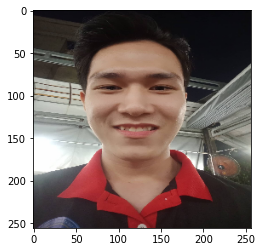

In [11]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/AI/Train/Face/Son/son.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="Hùng"
elif round(result[0][1])==1:
   prediction="Khang"
elif round(result[0][2])==1:
   prediction="Sơn"  
print(prediction)

Khang


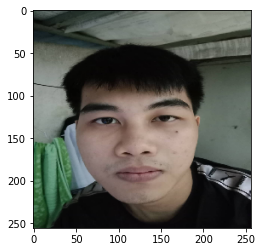

In [13]:
test_img=load_img('/content/drive/MyDrive/AI/Train/Face/Khang/khang.jpg',target_size=(256,256))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="Hùng"
elif round(result[0][1])==1:
   prediction="Khang"
elif round(result[0][2])==1:
   prediction="Sơn"  
print(prediction)

Hùng


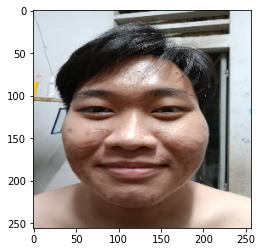

In [16]:
test_img=load_img('/content/drive/MyDrive/AI/Train/Face/Hung/hung.jpg',target_size=(256,256))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="Hùng"
elif round(result[0][1])==1:
   prediction="Khang"
elif round(result[0][2])==1:
   prediction="Sơn"  
print(prediction)